## **Homework2**  
Practical Part

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

xk = 0; yk = 100; zk = 10; xs = 100; ys = 0; zs = 10
sigma_r = 10; sigma_rho = 0.1
t = np.linspace(0, 100, num=50)

mu, sigma = 0, 1 
n = np.random.normal(mu, sigma, 50) #for every 2 seconds

zk_r = math.sqrt( (xk-xs)**2 + (yk-ys)**2 + zs**2 ) + sigma_r*n
zk_rho = math.atan((yk-ys)/(xk-xs)) + sigma_rho*n

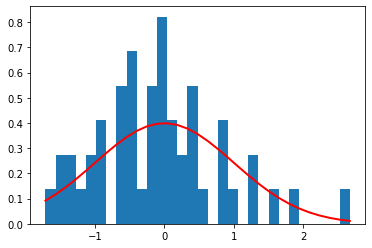

In [22]:
#normal distribution N(0, 1)
count, bins, ignored = plt.hist(n, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

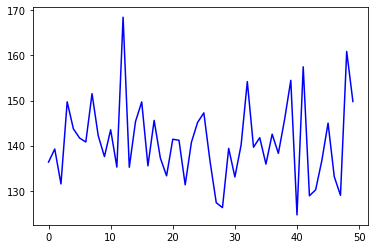

In [23]:
plt.plot(zk_r, label='zk_r', color='b')
plt.show()

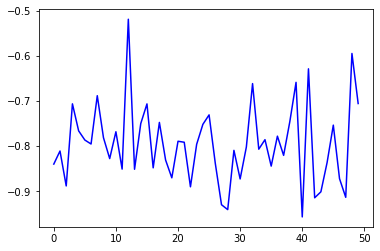

In [24]:
plt.plot(zk_rho, label='zk_rho', color='b')
plt.show()

In [25]:
print(n)

[-5.42998502e-01 -2.53182351e-01 -1.02741636e+00  7.93103937e-01
  1.93844660e-01 -9.59088533e-03 -9.77453965e-02  9.73581968e-01
  4.11263034e-02 -4.21135651e-01  1.73978388e-01 -6.54159573e-01
  2.66881240e+00 -6.57828223e-01  3.55367559e-01  7.91548203e-01
 -6.26165412e-01  3.80932859e-01 -4.53077854e-01 -8.47339263e-01
 -3.65248730e-02 -5.87250603e-02 -1.04667363e+00 -1.04448920e-01
  3.37994048e-01  5.48175430e-01 -5.26726524e-01 -1.44414040e+00
 -1.55276430e+00 -2.38679999e-01 -8.72255104e-01 -1.65162355e-01
  1.24177856e+00 -2.12592865e-01 -1.64363075e-03 -5.87628829e-01
  7.63428486e-02 -3.49529759e-01  3.99751973e-01  1.26960826e+00
 -1.71448366e+00  1.56933658e+00 -1.29021544e+00 -1.15775620e+00
 -5.08307371e-01  3.20812126e-01 -8.66827452e-01 -1.27979475e+00
  1.90985127e+00  7.99955571e-01]


In [26]:
print(zk_r)

[136.34448377 139.24264528 131.50030516 149.70550815 143.71291539
 141.67855993 140.79701482 151.51028846 142.18573182 137.56311228
 143.51425266 135.23287305 168.46259277 135.19618656 145.32814438
 149.68995082 135.51281467 145.58379738 137.24369025 133.30107615
 141.40922006 141.18721818 131.30773248 140.72997959 145.15440927
 147.25622309 136.50720354 127.3330648  126.24682575 139.3876688
 133.05191775 140.12284524 154.19225441 139.64854013 141.75803248
 135.8981805  142.53789727 138.2791712  145.77198852 154.47055142
 124.62963215 157.4678346  128.87231437 130.19690681 136.69139508
 144.98259005 133.10619426 128.97652132 160.87298148 149.7740245 ]


In [27]:
print(zk_rho)

[-0.83969801 -0.8107164  -0.8881398  -0.70608777 -0.7660137  -0.78635725
 -0.7951727  -0.68803997 -0.78128553 -0.82751173 -0.76800032 -0.85081412
 -0.51851692 -0.85118099 -0.74986141 -0.70624334 -0.8480147  -0.74730488
 -0.83070595 -0.87013209 -0.78905065 -0.79127067 -0.89006553 -0.79584306
 -0.75159876 -0.73058062 -0.83807082 -0.9298122  -0.94067459 -0.80926616
 -0.87262367 -0.8019144  -0.66122031 -0.80665745 -0.78556253 -0.84416105
 -0.77776388 -0.82035114 -0.74542297 -0.65843734 -0.95684653 -0.62846451
 -0.91441971 -0.90117378 -0.8362289  -0.75331695 -0.87208091 -0.91337764
 -0.59441304 -0.70540261]


Theoritical Part

## **Task1**

Kalman Filter: The Kalman filter helps to combine sensor data and accurately determine where a particular object is relative to the vehicle. Kalman must decide which state to believe according to the process and measurement error.

Initiation: it initially ignores covariance matrix P as large, and takes initial values as default as Gaussian mixture of N.

Prediction: it tries to predict the next state location for the agent by computing different matrices. It is not a learning step so it does not improve the result, expectation vector x_(k|k-1) and covariance matrix P_(k|k-1) are calculated by previous values of time steps k-1|k-1 values by multiplying matrices. x_(k|k-1) is defined by evolution matrice F and P_(k|k-1) is defined by multiplying F and P_(k-1|k-1) and also F inverse, then adding dynamics matrics D_(k|k-1) for regulation then width becomes broader to predict the state.

Filtering: It is a learning step that minimizing the matrices gives better results. Up to point k|k-1 for the state, we calculate the expectation vector and ovariance matrix latest knowledge and then calculate the next time step k|k such that it corrects the predicted equations before. x_(k|k) is determined by adding weighting matrix and innovation vector of measurement received(h matrix is measurement type). Weightning matrix is called kalman gain matrix that multiply knowledge covariance matrix with matrix H_tranpose and inverted matrix S that innovation matrix of quality knowledge multiplication H (measuerements) and P added by R and shrinked. covariance matrix P_(k|k) is determined by discarding weightning matrixes W and W_tranpose multiplied by matrix S.

Retrodiction: It is also a learning step that minimizing the matrices gives better results. By using filtering, prediction and dynamical model properties previously defined, we can measure the previous time step state from the current time step state by regulating the expectation vector and covariance matrix. weightning matrix is defined as multiplication of covariance matrix P and F and P-inverse. to calculate expectation vector x_(l|k), we calculate x_(l|l) and weigtning matrix with current state x_(l+1|k) minus x_(l+1|l) so that we calculate the difference between two states of the current time step, then update x to result in previous time step of the x_(l|k). Similar retroduction can be calculated for the covariance matrix P_(l|k) such that P_(l|l) by adding weitghtning matrix and its transpose multply by difference of current time step P_(l+1|k) and P_(l+1|l) and having P_(l|k). Then we can have Gaussian mixture of the N(x_l; x_(l|k), P_(l|k)) of the previous time step.

## **Task2**
By using sensor data fusion algorithms two measurements can be conbined as one, if one wants to get optimal measurement can use kalman filter. Also the measurement which is calculated from two sensor measurements is more accurate than the one measurement. Because just one sensor measurement can contain such noises.

Kalman Filter has two equations as follows:

1) $x_k=Ax_{k-1}+Bu_k+w_{k-1}$

2) $z_k=Hx_k+v_k$


$x_k$ is our signal value and can be evaluated by linear stochastic equation which is the first equation here. Generally there aren't control signal $u_k$

Here the second equation is a linear combination of signal value and meaurement noise also both are considered Gaussians.

The entities $A$,$B$ and $H$ are general form matrices. These values can change between states.

If the system which we'll use fits into this model we just need to estimate the mean and the standard deviation of the noise functions $w_{k-1}$ and $v_k$.

Eventually we need to remember that "The better you estimate the noise parameters, the better estimates you get."


## **Task3**

By given definition of the measurement formula, we can calculate the form of the measurement in the cartesian coordinates. 

First we need to calculate zk_r = root((xk-xs)**2 + (yk-ys)**2 + zs**2) + sigma_r * n, then we can calculate zk_rho = atan((yk-ys)/(xk-xs)) + sigma_rho * n. 

Then we can convert zk_r and zk_rho values into the cartesian coordinates as x = zk_rho * cos(zk_r) and y = zk_rho * sin(zk_r). 

For the n1 = -0.5429: zk_r = 136.3455, zk_rho = -6.2144 and cartesian coordinates are x = 135.5443, y = -14.7592

For the n2 = -0.2531: zk_r = 139.2434, zk_rho = -3.3164 and cartesian coordinates are x = 139.0102 y = -8.0552